# Temperature Forecast Project using ML

Problem Statement:
Data Set Information:

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.


Attribute Information:

For more information, read [Cho et al, 2020].
1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

# Target

1) Next_Tmax: Next day maximum temperature

2) Next_Tmin: Next day  minimum temperature

# Importing Libraries

In [519]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.metrics import classification_report
from scipy.stats import skew
from sklearn.preprocessing import power_transform
from sklearn import metrics
from sklearn.impute import SimpleImputer
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
from sklearn.preprocessing import LabelEncoder,StandardScaler,OneHotEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,mean_squared_error,roc_curve,precision_recall_curve
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,ExtraTreesRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")

Importing Data

In [520]:
tr=pd.read_csv("temperature.csv")

In [521]:
tr.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


A per the datasheet , only one column is object type and  rest all are numeric

In [522]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


Nan values are present in some columns

In [523]:
tr['Date'].mode(dropna=True)

0      01-07-2013
1      01-07-2014
2      01-07-2015
3      01-07-2016
4      01-07-2017
          ...    
305    31-07-2013
306    31-07-2014
307    31-07-2015
308    31-07-2016
309    31-07-2017
Length: 310, dtype: object

Dropping nan values from Date column 

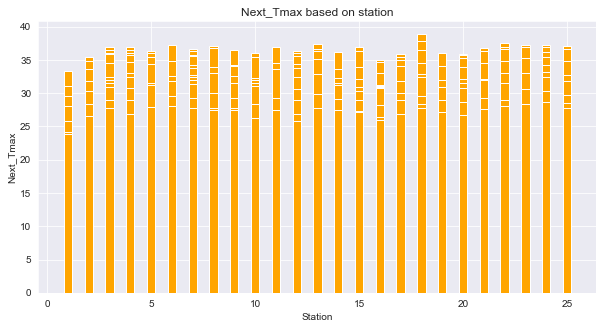

In [524]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(tr['station'], tr['Next_Tmax'], color ='orange',
        width = 0.4)
 
plt.xlabel("Station")
plt.ylabel("Next_Tmax")
plt.title("Next_Tmax based on station")
plt.show()

The above Visualization shows the relation between station and Next_Tmax column

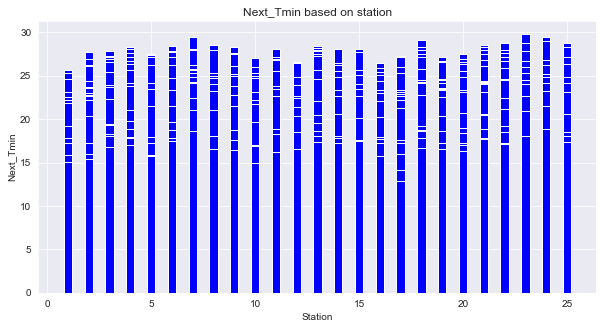

In [525]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(tr['station'], tr['Next_Tmin'], color ='blue',
        width = 0.4)
 
plt.xlabel("Station")
plt.ylabel("Next_Tmin")
plt.title("Next_Tmin based on station")
plt.show()

The above Visualization shows the relation between station and Next_Tmin column

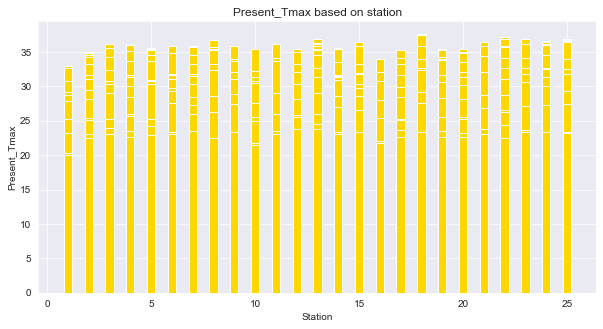

In [526]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(tr['station'], tr['Present_Tmax'], color ='gold',
        width = 0.4)
 
plt.xlabel("Station")
plt.ylabel("Present_Tmax")
plt.title("Present_Tmax based on station")
plt.show()

The above Visualization shows the relation between station and Present_Tmax column

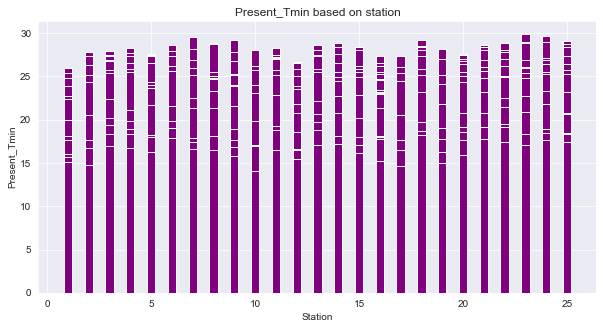

In [527]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(tr['station'], tr['Present_Tmin'], color ='purple',
        width = 0.4)
 
plt.xlabel("Station")
plt.ylabel("Present_Tmin")
plt.title("Present_Tmin based on station")
plt.show()

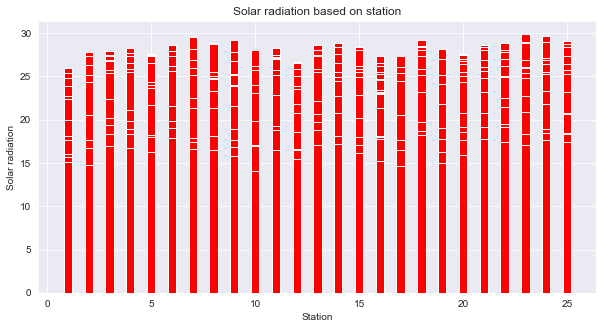

In [528]:
ig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(tr['station'], tr['Present_Tmin'], color ='red',
        width = 0.4)
 
plt.xlabel("Station")
plt.ylabel("Solar radiation")
plt.title("Solar radiation based on station")
plt.show()

The above Visualization shows the relation between station and Present_Tmin column

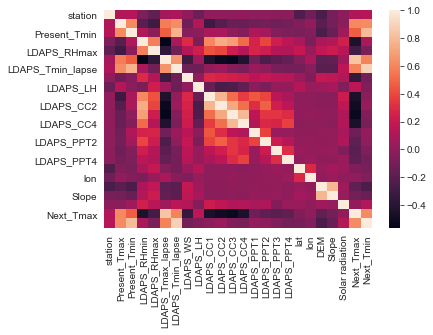

In [529]:
sns.heatmap(tr.corr());

The above Visualization shows the correlation between different columns

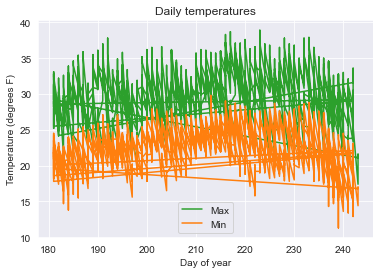

In [530]:
Date = pd.to_datetime(tr['Date'],
                                 format='%d-%m-%Y')
plt.plot(Date.dt.dayofyear,
         tr.Next_Tmax, 'C2')
plt.plot(Date.dt.dayofyear,
         tr.Next_Tmin, 'C1')
plt.legend(['Max', 'Min'])
plt.xlabel('Day of year')
plt.ylabel('Temperature (degrees F)')
plt.title('Daily temperatures')
plt.show()

The above Visualization shows  Next_Tmax  and Next_Tmin  based on day of the year

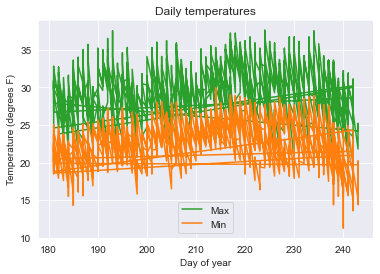

In [531]:
Date = pd.to_datetime(tr['Date'],
                                 format='%d-%m-%Y')
plt.plot(Date.dt.dayofyear,
         tr.Present_Tmax, 'C2')
plt.plot(Date.dt.dayofyear,
         tr.Present_Tmin, 'C1')
plt.legend(['Max', 'Min'])
plt.xlabel('Day of year')
plt.ylabel('Temperature (degrees F)')
plt.title('Daily temperatures')
plt.show()

The above Visualization shows  Present_Tmax  and Present_Tmin  based on day of the year

In [532]:
tr['Date'].fillna('01-07-2013',inplace=True)
tr['station'].fillna('1.0',inplace=True)
tr['station'] = tr['station'].astype(float)
tr['Present_Tmax'].fillna('31.4',inplace=True)
tr['Present_Tmax'] = tr['Present_Tmax'].astype(float)

tr['Present_Tmin'].fillna('24.0',inplace=True)
tr['Present_Tmin'] = tr['Present_Tmin'].astype(float)
tr['LDAPS_RHmin'].fillna('19.794666',inplace=True)
tr['LDAPS_RHmin'] = tr['LDAPS_RHmin'].astype(float)

tr['LDAPS_RHmax'].fillna('58.936283',inplace=True)
tr['LDAPS_RHmax'] = tr['LDAPS_RHmax'].astype(float)

tr['LDAPS_Tmax_lapse'].fillna('17.624954',inplace=True)
tr['LDAPS_Tmax_lapse'] = tr['LDAPS_Tmax_lapse'].astype(float)

tr['LDAPS_Tmin_lapse'].fillna('14.272646',inplace=True)
tr['LDAPS_Tmin_lapse'] = tr['LDAPS_Tmin_lapse'].astype(float)

tr['LDAPS_WS'].fillna('2.882580',inplace=True)
tr['LDAPS_WS'] = tr['LDAPS_WS'].astype(float)

tr['LDAPS_LH'].fillna('-13.603212',inplace=True)
tr['LDAPS_LH'] = tr['LDAPS_LH'].astype(float)

tr['LDAPS_CC1'].fillna('0.0',inplace=True)
tr['LDAPS_CC1'] = tr['LDAPS_CC1'].astype(float)

tr['LDAPS_CC2'].fillna('0.0',inplace=True)
tr['LDAPS_CC2'] = tr['LDAPS_CC2'].astype(float)

tr['LDAPS_CC3'].fillna('0.0',inplace=True)
tr['LDAPS_CC3'] = tr['LDAPS_CC3'].astype(float)

tr['LDAPS_CC4'].fillna('0.0',inplace=True)
tr['LDAPS_CC4'] = tr['LDAPS_CC4'].astype(float)

tr['LDAPS_PPT1'].fillna('0.0',inplace=True)
tr['LDAPS_PPT1'] = tr['LDAPS_PPT1'].astype(float)

tr['LDAPS_PPT2'].fillna('0.0',inplace=True)
tr['LDAPS_PPT2'] = tr['LDAPS_PPT2'].astype(float)

tr['LDAPS_PPT3'].fillna('0.0',inplace=True)
tr['LDAPS_PPT3'] = tr['LDAPS_PPT3'].astype(float)

tr['LDAPS_PPT4'].fillna('0.0',inplace=True)
tr['LDAPS_PPT4'] = tr['LDAPS_PPT4'].astype(float)

tr['Next_Tmax'].fillna('29.3',inplace=True)
tr['Next_Tmax'] = tr['Next_Tmax'].astype(float)

tr['Next_Tmin'].fillna('23.5',inplace=True)
tr['Next_Tmin'] = tr['Next_Tmin'].astype(float)




Removing null values form dataset based on mode on the columns

# Finding outliers

<AxesSubplot:>

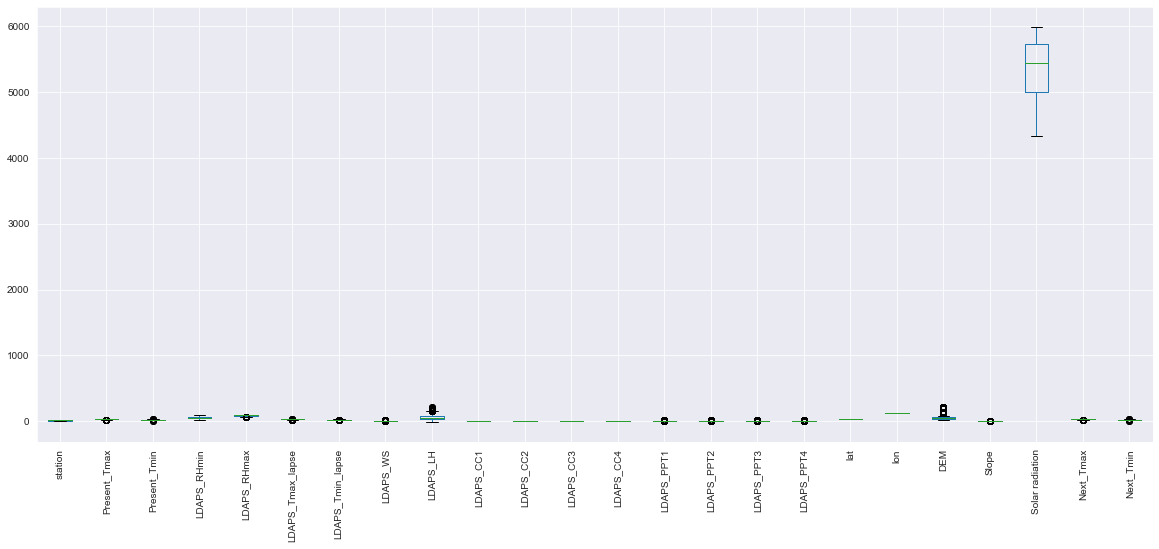

In [533]:
tr.boxplot( rot = 90, figsize=(20,8))

In [534]:
pd.set_option('display.max_columns',100)

In [535]:
tr.mode(axis=0,dropna=True)

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,01-07-2013,31.4,24.0,19.794666,58.936283,17.624954,14.272646,2.88258,-13.603212,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.5507,126.826,12.370,0.0985,4371.684570,29.3,23.5
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.5776,127.135,212.335,0.1332,4406.334473,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1457,4413.500000,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1554,4434.277832,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.2223,4435.611816,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1521,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5968.809082,NaN,NaN
1522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5975.676270,NaN,NaN
1523,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5981.979492,NaN,NaN
1524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5987.718750,NaN,NaN


In [536]:
tr.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [537]:
temp=['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation']
from scipy.stats import zscore
z=np.abs(zscore(tr[temp]))

tr_new=tr[(z<3).all(axis=1)]

print('\n Train',tr.shape)

print('\n Train new',tr_new.shape)
tr=tr_new



 Train (7752, 25)

 Train new (6886, 25)


Outliers removed

In [538]:
tr.skew()

station             0.000178
Present_Tmax       -0.290759
Present_Tmin       -0.242630
LDAPS_RHmin         0.314152
LDAPS_RHmax        -0.731006
LDAPS_Tmax_lapse   -0.122113
LDAPS_Tmin_lapse   -0.440602
LDAPS_WS            1.091957
LDAPS_LH            0.571581
LDAPS_CC1           0.592111
LDAPS_CC2           0.501652
LDAPS_CC3           0.697336
LDAPS_CC4           0.712070
LDAPS_PPT1          3.744481
LDAPS_PPT2          4.865935
LDAPS_PPT3          5.493061
LDAPS_PPT4          5.956806
lat                 0.107443
lon                -0.273089
DEM                 1.763667
Slope               1.597559
Solar radiation    -0.515331
Next_Tmax          -0.270899
Next_Tmin          -0.318795
dtype: float64

-0.10620831725007171


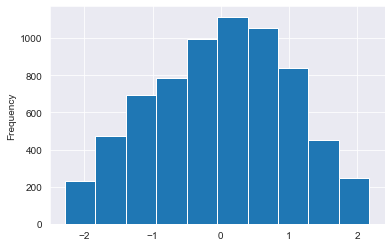

In [539]:
tr['LDAPS_RHmax']=power_transform(tr[['LDAPS_RHmax']], method='yeo-johnson')
tr['LDAPS_RHmax'].plot.hist()
print(skew(tr['LDAPS_RHmax']))







0.008127018589932887


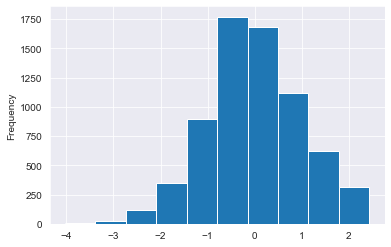

In [540]:
tr['LDAPS_WS']=power_transform(tr[['LDAPS_WS']], method='yeo-johnson')
tr['LDAPS_WS'].plot.hist()
print(skew(tr['LDAPS_WS']))


-0.031062192334102554


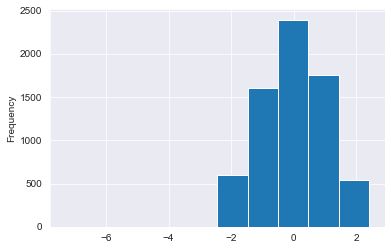

In [541]:
tr['LDAPS_LH']=power_transform(tr[['LDAPS_LH']], method='yeo-johnson')
tr['LDAPS_LH'].plot.hist()
print(skew(tr['LDAPS_LH']))


0.06526452421193199


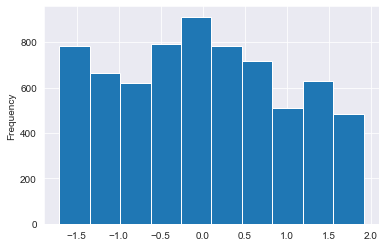

In [542]:

tr['LDAPS_CC1']=power_transform(tr[['LDAPS_CC1']], method='yeo-johnson')
tr['LDAPS_CC1'].plot.hist()
print(skew(tr['LDAPS_CC1']))


0.05001367822592266


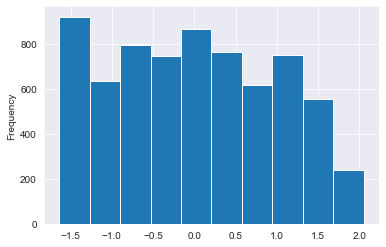

In [543]:

tr['LDAPS_CC2']=power_transform(tr[['LDAPS_CC2']], method='yeo-johnson')
tr['LDAPS_CC2'].plot.hist()
print(skew(tr['LDAPS_CC2']))


0.09413810306563188


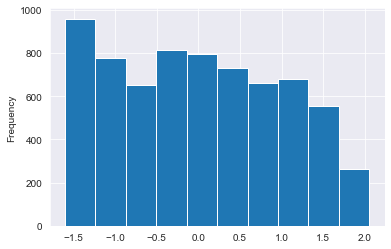

In [544]:

tr['LDAPS_CC3']=power_transform(tr[['LDAPS_CC3']], method='yeo-johnson')
tr['LDAPS_CC3'].plot.hist()
print(skew(tr['LDAPS_CC3']))



0.14293459659949584


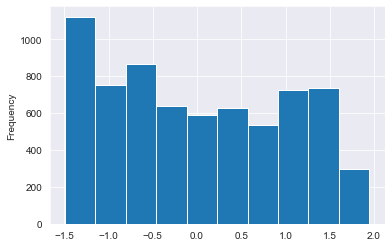

In [545]:
tr['LDAPS_CC4']=power_transform(tr[['LDAPS_CC4']], method='yeo-johnson')
tr['LDAPS_CC4'].plot.hist()
print(skew(tr['LDAPS_CC4']))


1.6195633920649244


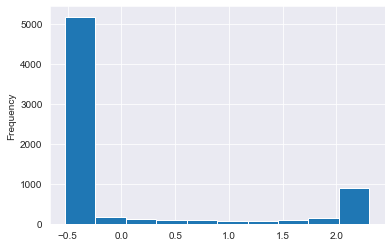

In [546]:

tr['LDAPS_PPT1']=power_transform(tr[['LDAPS_PPT1']], method='yeo-johnson')
tr['LDAPS_PPT1'].plot.hist()
print(skew(tr['LDAPS_PPT1']))


1.8229588977391138


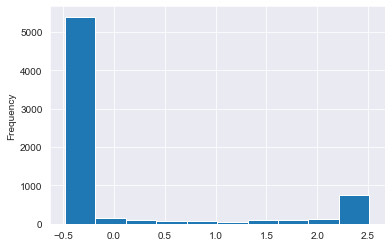

In [547]:

tr['LDAPS_PPT2']=power_transform(tr[['LDAPS_PPT2']], method='yeo-johnson')
tr['LDAPS_PPT2'].plot.hist()
print(skew(tr['LDAPS_PPT2']))


1.997839678358057


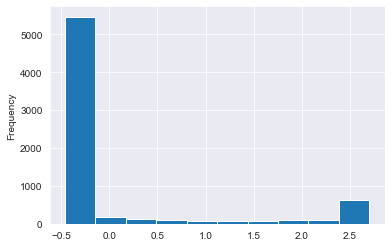

In [548]:

tr['LDAPS_PPT3']=power_transform(tr[['LDAPS_PPT3']], method='yeo-johnson')
tr['LDAPS_PPT3'].plot.hist()
print(skew(tr['LDAPS_PPT3']))


2.2697159057911547


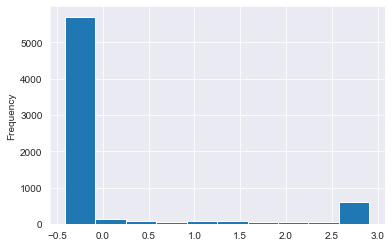

In [549]:

tr['LDAPS_PPT4']=power_transform(tr[['LDAPS_PPT4']], method='yeo-johnson')
tr['LDAPS_PPT4'].plot.hist()
print(skew(tr['LDAPS_PPT4']))


0.03907074223982485


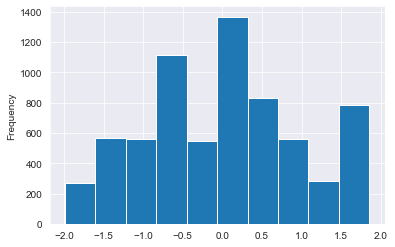

In [550]:

tr['DEM']=power_transform(tr[['DEM']], method='yeo-johnson')
tr['DEM'].plot.hist()
print(skew(tr['DEM']))



0.2341720193177845


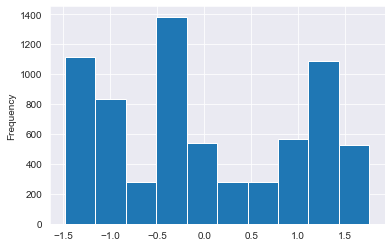

In [551]:
tr['Slope']=power_transform(tr[['Slope']], method='yeo-johnson')
tr['Slope'].plot.hist()
print(skew(tr['Slope']))


-0.17253491912151547


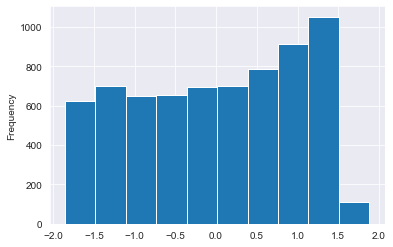

In [552]:

tr['Solar radiation']=power_transform(tr[['Solar radiation']], method='yeo-johnson')
tr['Solar radiation'].plot.hist()
print(skew(tr['Solar radiation']))

Skewness has been removed for colmuns qith threshold greater than +-0.5


In [553]:
tr["Day"] = tr['Date'].str.split('-').str[0].astype(int)
tr["Month"] = tr['Date'].str.split('-').str[1].astype(int)
tr["Year"] = tr['Date'].str.split('-').str[2].astype(int)

Splitting date column and creating new feature

In [554]:
tr.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,Year
0,1.0,30-06-2013,28.7,21.4,58.255688,0.352834,28.074101,23.006936,0.172256,0.350250,-0.306390,-0.424936,-0.464612,-0.513158,-0.524792,-0.483988,-0.461333,-0.414339,37.6046,126.991,1.853469,1.330711,1.880923,29.1,21.2,30,6,2013
1,2.0,30-06-2013,31.9,21.6,52.263397,0.266190,29.850689,24.035009,-0.577588,-0.165036,-0.347526,-0.191991,-0.477841,-0.533329,-0.524792,-0.483988,-0.461333,-0.414339,37.6046,127.032,0.070385,-0.373723,1.424840,30.5,22.5,30,6,2013
2,3.0,30-06-2013,31.6,23.3,48.690479,-0.703953,30.091292,24.565633,-0.255633,-1.375003,-0.427927,-0.165320,-0.226881,-0.443850,-0.524792,-0.483988,-0.461333,-0.414339,37.5776,127.058,-0.352737,-0.943719,1.404465,31.1,23.9,30,6,2013
3,4.0,30-06-2013,32.0,23.4,58.239788,1.377092,29.704629,23.326177,-0.609720,0.246524,-0.392705,-0.315362,-0.467774,-0.492403,-0.524792,-0.483988,-0.461333,-0.414339,37.6450,127.022,0.099442,1.252241,1.381233,31.7,24.3,30,6,2013
4,5.0,30-06-2013,31.4,21.9,56.174095,0.191537,29.113934,23.486480,-0.544847,1.294571,-0.734707,-0.200349,-0.365667,-0.279269,-0.524792,-0.483988,-0.461333,-0.414339,37.5507,127.135,-0.278112,-0.390272,1.390341,31.2,22.5,30,6,2013


In [555]:
tr.drop(["Date"], axis = 1, inplace = True)

Dropping date column form the dataset

In [556]:
y=tr['Next_Tmax']
y2=tr['Next_Tmin']
y_y = pd.concat([y,y2],axis=1)
x=tr.drop(columns=['Next_Tmax','Next_Tmin'])

dividing data into x and y for performing ML

In [557]:
x.head()


,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Day,Month,Year
0,1.0,28.7,21.4,58.255688,0.352834,28.074101,23.006936,0.172256,0.350250,-0.306390,-0.424936,-0.464612,-0.513158,-0.524792,-0.483988,-0.461333,-0.414339,37.6046,126.991,1.853469,1.330711,1.880923,30,6,2013
1,2.0,31.9,21.6,52.263397,0.266190,29.850689,24.035009,-0.577588,-0.165036,-0.347526,-0.191991,-0.477841,-0.533329,-0.524792,-0.483988,-0.461333,-0.414339,37.6046,127.032,0.070385,-0.373723,1.424840,30,6,2013
2,3.0,31.6,23.3,48.690479,-0.703953,30.091292,24.565633,-0.255633,-1.375003,-0.427927,-0.165320,-0.226881,-0.443850,-0.524792,-0.483988,-0.461333,-0.414339,37.5776,127.058,-0.352737,-0.943719,1.404465,30,6,2013
3,4.0,32.0,23.4,58.239788,1.377092,29.704629,23.326177,-0.609720,0.246524,-0.392705,-0.315362,-0.467774,-0.492403,-0.524792,-0.483988,-0.461333,-0.414339,37.6450,127.022,0.099442,1.252241,1.381233,30,6,2013
4,5.0,31.4,21.9,56.174095,0.191537,29.113934,23.486480,-0.544847,1.294571,-0.734707,-0.200349,-0.365667,-0.279269,-0.524792,-0.483988,-0.461333,-0.414339,37.5507,127.135,-0.278112,-0.390272,1.390341,30,6,2013


In [558]:
y_y.head()

,Next_Tmax,Next_Tmin
0,29.1,21.2
1,30.5,22.5
2,31.1,23.9
3,31.7,24.3
4,31.2,22.5


In [559]:
from sklearn.preprocessing import StandardScaler 

x = StandardScaler().fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(x,y_y,test_size=0.2,random_state=45)

Scaling and splitting x and y for fitting into model

In [560]:
def met(y_act, y_pred):
    return(1-(np.sqrt(np.mean((np.log10(y_act) - np.log10(y_pred))**2))))

from sklearn.metrics import make_scorer
my_met= make_scorer(met, greater_is_better=False)
models = []
#models.append(('xgr', XGBRegressor()))
#models.append(('gbr', GradientBoostingRegressor()))
models.append(('forest', RandomForestRegressor()))
models.append(('tree', DecisionTreeRegressor()))
models.append(('ridge', Ridge(alpha=1.5)))
models.append(('lin', LinearRegression()))
models.append(('lasso', Lasso(alpha=1.5)))
models.append(('Extra Tree', ExtraTreesRegressor()))
#models.append(('Adaboost', AdaBoostRegressor()))
#models.append(('Svr', SVR()))


# evaluate each model in turn


for name, model in models:
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)

    a=model.score(x_train, y_train)



    b=model.score(x_test, y_test)




    c=metrics.mean_squared_error(y_test, y_pred)

    sc = cross_val_score(model,x_train,y_train,scoring='r2',cv=5).mean()
    
  

    msg = "%s: \n Train: %f \nTest: %f \nMSE: %f " % (name,a,b,c)
    print(msg)
    print('\n')
    print('cross val score : ',sc)
    #print('-cval:  ',(-cross_val_score(model,x_train,y_train,scoring=my_met,cv=5)).mean())
    print('\n-------------------------------------------------------------------------------------------------------------')
    #print(y_pred)
    


forest: 
 Train: 0.984501 
Test: 0.894605 
MSE: 0.781256 


cross val score :  0.8818469807333857

-------------------------------------------------------------------------------------------------------------
tree: 
 Train: 1.000000 
Test: 0.726002 
MSE: 2.029038 


cross val score :  0.7207807728636089

-------------------------------------------------------------------------------------------------------------
ridge: 
 Train: 0.794206 
Test: 0.795531 
MSE: 1.569954 


cross val score :  0.7918610588209585

-------------------------------------------------------------------------------------------------------------
lin: 
 Train: 0.794216 
Test: 0.795504 
MSE: 1.570184 


cross val score :  0.7918692496374704

-------------------------------------------------------------------------------------------------------------
lasso: 
 Train: 0.387124 
Test: 0.387214 
MSE: 4.516199 


cross val score :  0.38645053059648415

-----------------------------------------------------------------------

Using for loop for testing various algorithms 

extra tree performs better compared to other so we will hyperparameter tune it

# Hyper parameter tuning

In [561]:
model = ExtraTreesRegressor()
                            
gsc = GridSearchCV(
    estimator=model,
    param_grid={
        #'n_estimators': range(50,126,25),
        'max_features': range(0,100),
        #'min_samples_leaf': range(20,50,5),
        #'min_samples_split': range(15,36,5),
    },
    scoring='r2',
    cv=5
)

grid_result = gsc.fit(x_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


model = ExtraTreesRegressor(**grid_result.best_params_)

model.fit(x_train, y_train)

a=model.score(x_train, y_train)


b=model.score(x_test, y_test)




c=metrics.mean_squared_error(y_test, y_pred)

sc = cross_val_score(model,x_train,y_train,scoring='r2',cv=5).mean()
    
  

msg = "%s: \n Train: %f \nTest: %f \nMSE: %f " % (name,a,b,c)
print(msg)
print('\n')
print('cross val score : ',sc)
#print('-cval:  ',(-cross_val_score(model,x_train,y_train,scoring=my_met,cv=5)).mean())
print('\n-------------------------------------------------------------------------------------------------------------') 


Best: 0.909267 using {'max_features': 10}
Extra Tree: 
 Train: 1.000000 
Test: 0.917035 
MSE: 0.610754 


cross val score :  0.9097561237913478

-------------------------------------------------------------------------------------------------------------


the performance of model is slightly increased after tuning so we can use that for saving model

# Saving model

In [562]:
import joblib
joblib.dump(gsc.best_estimator_,"temperature.obj")

['temperature.obj']